In [4]:
!pip install xgboost

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [162]:
train = pd.read_csv(r'C:\Users\prasad\Downloads\Dataset files\ForestTypeCover\train.csv')
test = pd.read_csv(r'C:\Users\prasad\Downloads\Dataset files\ForestTypeCover\test.csv')

### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

In [163]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2524,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,13295,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,4312,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,10656,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,868,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [164]:
print(f'The shape of the data is {train.shape}')
print(f'The datatypes are {train.dtypes}')

The shape of the data is (9072, 56)
The datatypes are Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7            

In [165]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [166]:
catlist = []
numlist = []
for cols in train.columns.tolist():  
    if train[cols].nunique()<100:
        catlist.append(cols)
    else:
        numlist.append(cols)
print(f'Number of categorical features is {len(catlist)}')
print(f'Number of numerical features is {len(numlist)}')

Number of categorical features is 46
Number of numerical features is 10


Univarate distributions

Creating better representation for the categorical features having 2 unique values and visulaizing the dominance of 0 in terms of percentage of total entries

In [167]:
catlis = []
catlis1 = []
for cols in [  cols for cols in catlist if len([x for x in train[cols].unique()])==2 ]  :
    catlis.append((cols, len(train[train[cols]==0])/len(train)))
    catlis1.append(cols)
catlis2 = [x for x in catlist if x not in catlis1]

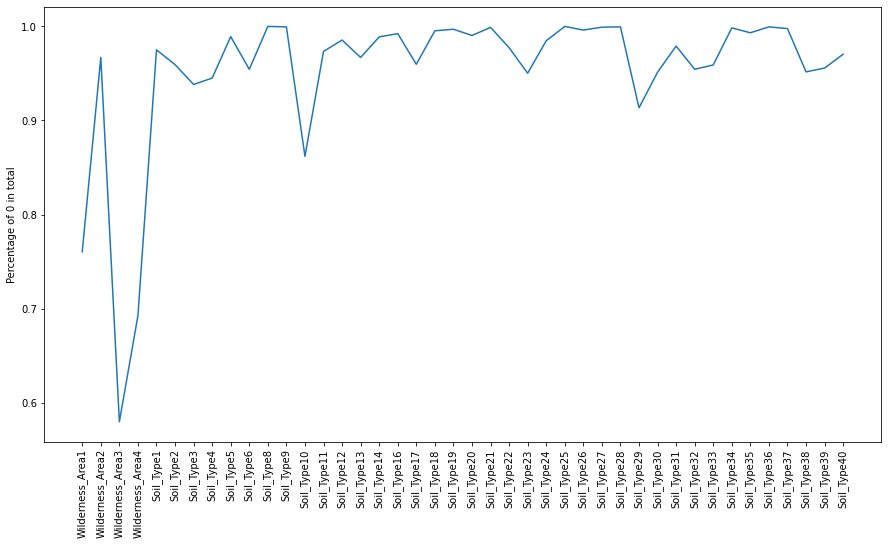

In [168]:
plt.figure(figsize = (15,8))
plt.plot(pd.Series(dict(catlis)))
plt.xticks(rotation = 90)
plt.ylabel('Percentage of 0 in total')
plt.show()

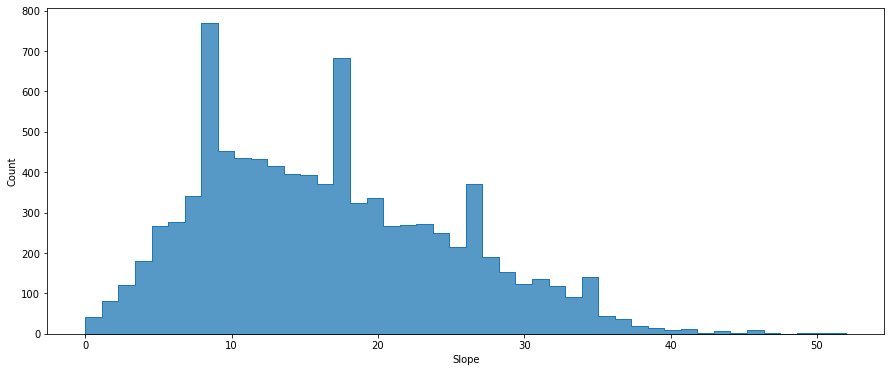

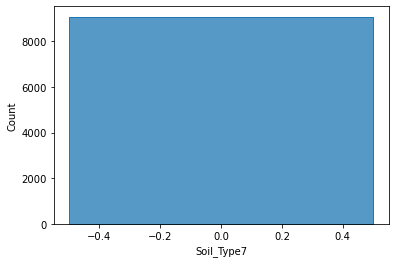

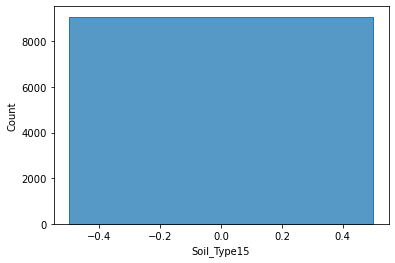

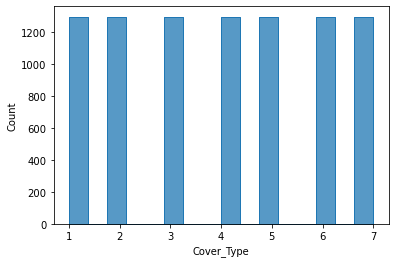

In [169]:
plt.figure(figsize = (15,6))
for cols in catlis2:
    sns.histplot(train[cols], multiple = 'dodge', element ='step')
    plt.show()

Scatter plots and histograms for numerical features

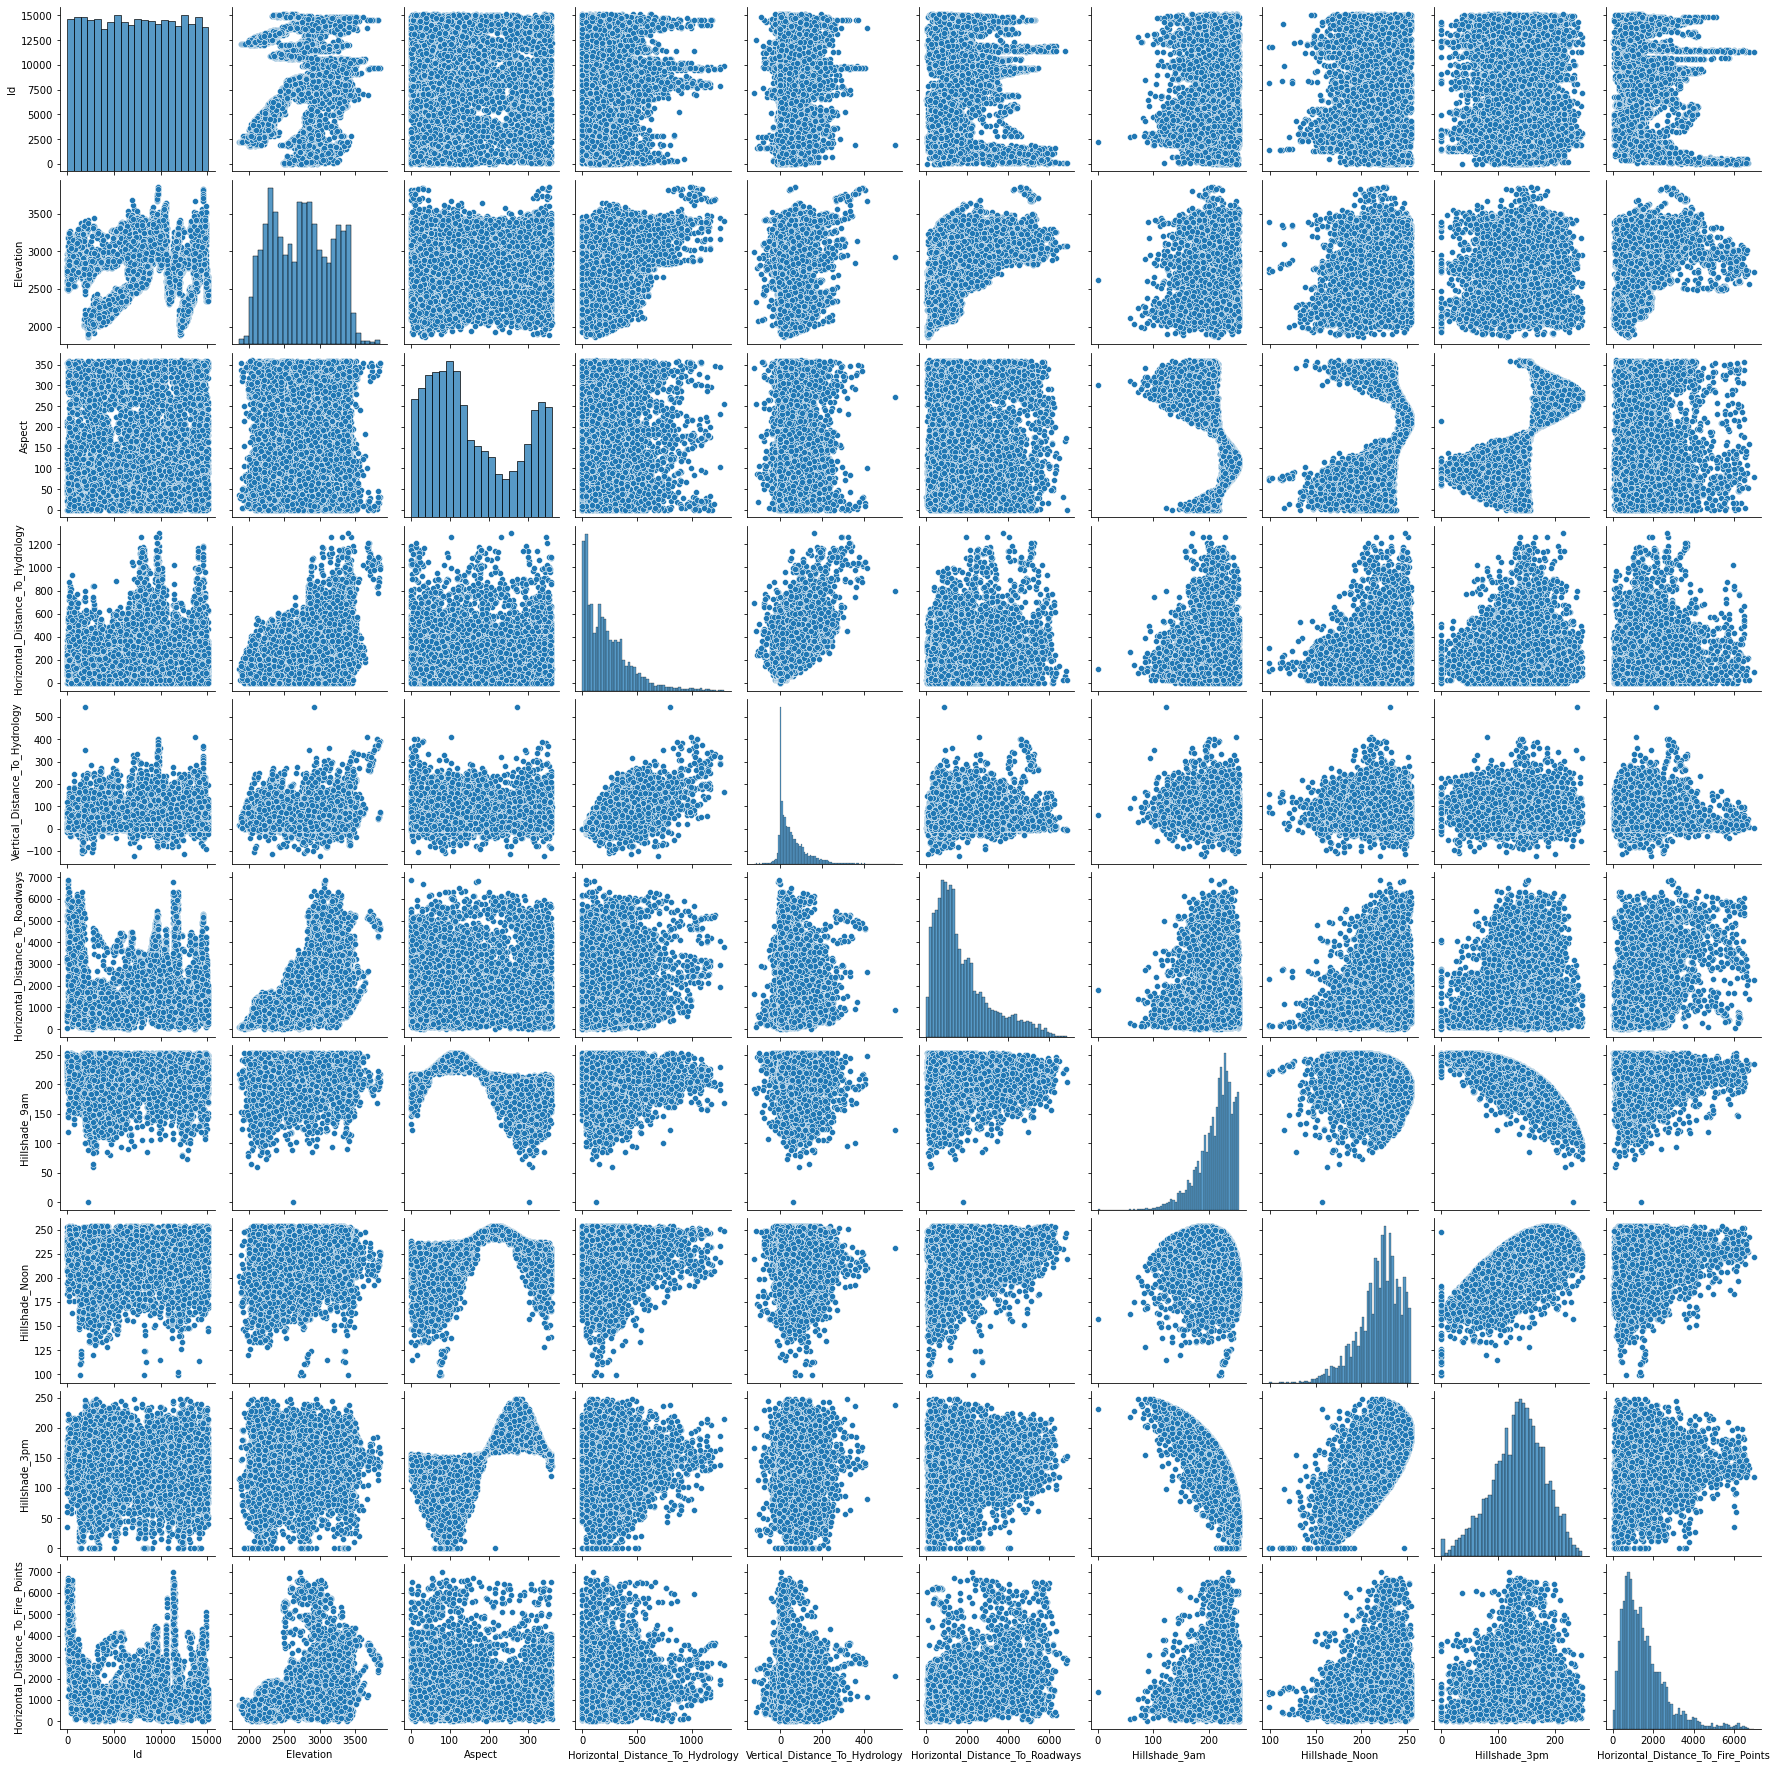

In [99]:
sns.pairplot(data = train[numlist])


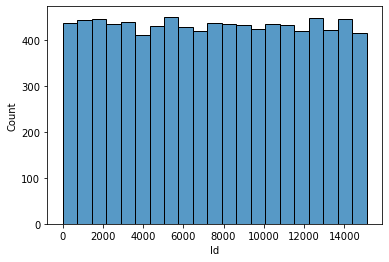

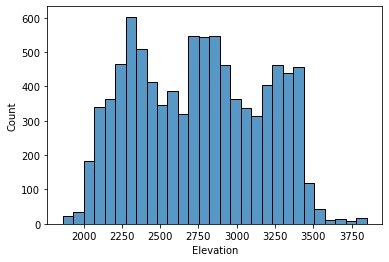

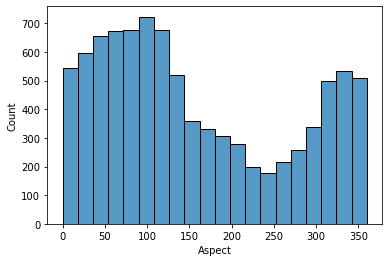

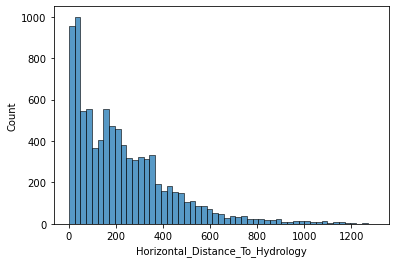

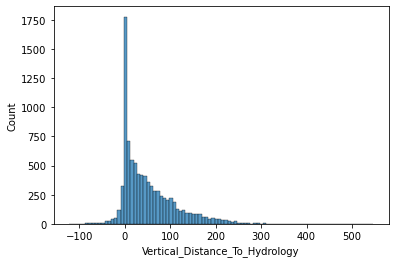

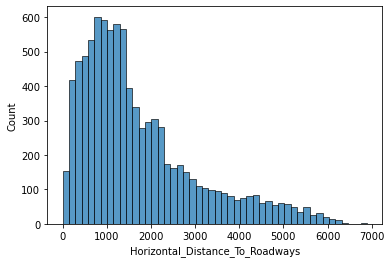

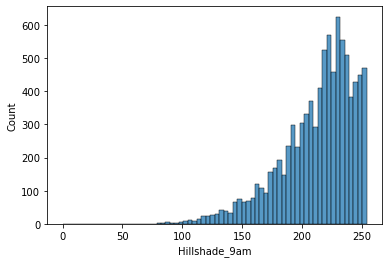

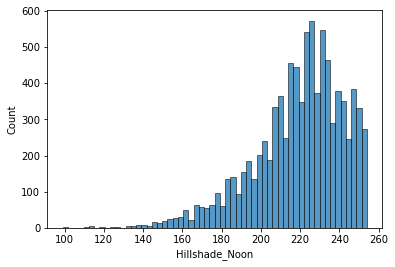

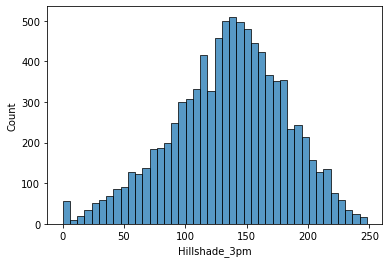

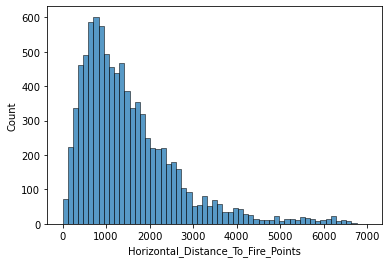

In [115]:
for cols in numlist:
    sns.histplot(train[cols])
    plt.show()

Removing the columns having same value for all entries

In [170]:
train.drop(['Soil_Type7', 'Soil_Type15'], axis = 1, inplace = True)
test.drop(['Soil_Type7', 'Soil_Type15'], axis = 1, inplace = True)

### Feature Selection and Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different feature selection techniques like wrapper methods, PCA and try using hyperparameter tuning to find the parameters that give the best accuracy.

In [124]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3)


In [125]:
train_copy = train.copy()
X = train_copy.drop('Cover_Type', axis = 1)
y = train_copy['Cover_Type']

In [236]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
xgboost = XGBClassifier()
models = [logreg, tree, forest, xgboost]

In [237]:
scores = []
for model in models:
    scores.append(cross_val_score(model, X, y, cv = cv, error_score = 'accuracy'))
    print(model)

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
[15:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavi

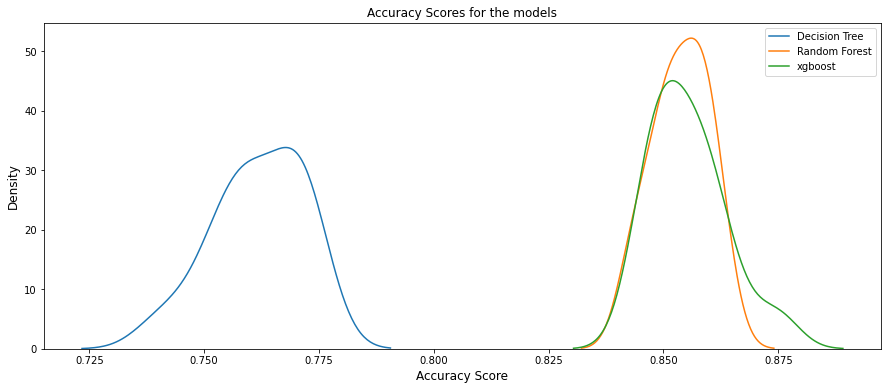

In [238]:
scoresdf = pd.DataFrame(dict(zip(models, scores)))
plt.figure(figsize = (15,6))
for col in scoresdf.columns.tolist():
    if col==logreg:
        continue
    else:
        sns.kdeplot(scoresdf[col])
plt.legend(['Decision Tree', 'Random Forest', 'xgboost'])        
plt.xlabel('Accuracy Score', fontsize = 'large')
plt.ylabel('Density', fontsize = 'large')
plt.title('Accuracy Scores for the models', fontsize = 'large')
plt.show()

In [219]:
preds = []
for model in models:
    model.fit(X, y)
    preds.append(model.predict(test))

[14:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [224]:
Submission1 =pd.DataFrame( {'Cover_Type':preds[3]}, index = test['Id'])
Submission1.to_csv('Submission1.csv')

The accuracy of the model came out to be 87%

Trying to tune the model's HyperParameters

In [210]:
parameters = {'criterion':['gini', 'entropy'],'max_depth' :np.arange(1,4), 'min_samples_leaf':[1,2,3]}

In [211]:
grid = GridSearchCV(estimator = tree, param_grid = parameters, cv = 5)
grid.fit(X,y)
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [201]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X, y)
pred = tree.predict(test)
Submission2 = pd.DataFrame({'Cover_Type':pred}, index = test['Id'])
Submission2.to_csv('Submission2.csv')

In [215]:
parameters ={'max_depth' :[1,2,3,4,5,6,7,8,9,10], 'n_estimators':[10,30,50,75,100]}

In [216]:
grid = GridSearchCV(estimator = forest, param_grid = parameters, cv = 5, error_score = 'accuracy')
grid.fit(X,y)
grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=75)

In [225]:
forest = RandomForestClassifier(max_depth=10, n_estimators=75)
forest.fit(X, y)
pred = forest.predict(test)
Submission3 = pd.DataFrame({'Cover_Type':pred}, index = test['Id'])
Submission3.to_csv('Submission3.csv')

In [228]:
kbest = SelectKBest(score_func  =f_classif)

In [229]:
kbest.fit(X,y)

SelectKBest()

In [230]:
X_best = kbest.transform(X)

In [233]:
scores = []
for model in models:
    scores.append(cross_val_score(model, X_best, y, cv = cv, error_score = 'accuracy'))
    print(model)

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
[15:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavi

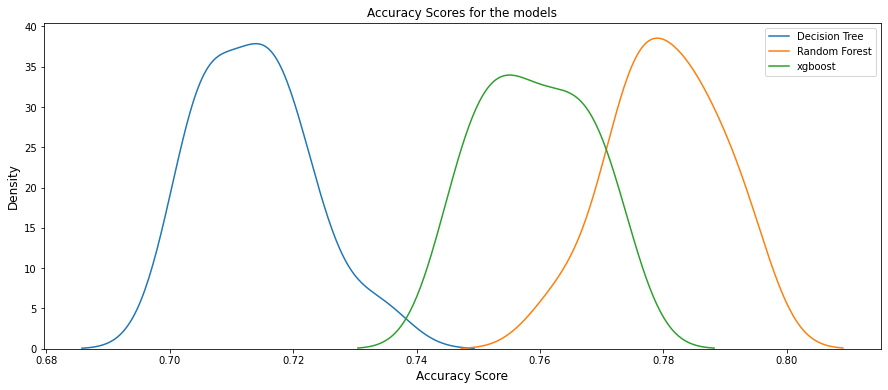

In [235]:
scoresdf = pd.DataFrame(dict(zip(models, scores)))
plt.figure(figsize = (15,6))
for col in scoresdf.columns.tolist():
    if col==logreg:
        continue
    else:
        sns.kdeplot(scoresdf[col])
plt.legend(['Decision Tree', 'Random Forest', 'xgboost'])        
plt.xlabel('Accuracy Score', fontsize = 'large')
plt.ylabel('Density', fontsize = 'large')
plt.title('Accuracy Scores for the models', fontsize = 'large')
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.